파이썬 머신러닝 완벽가이드 ch7. 1 ~ 2 (pg. 431~449)

---------------------
#07. 군집화 (Clustering)

####07-01. K-평균 알고리즘 이해
- 사이킷런 KMeans 클래스 소개
- K-평균을 이용한 붓꽃 데이터 세트 군집화
- 군집화 알고리즘 테스트를 위한 데이터 생성

####07-02. 군집 평가 (Clustering Evaluation)
- 실루엣 분석의 개요
- 붓꽃 데이터 세트를 이용한 군집 평가
- 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법
---------

####**07-01. K-평균 알고리즘 이해**

K-평균은 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘. 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택하여 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법.
- K-평균 작동 원리 (순서) :

   1. 군집 중심점을 선택된 포인트의 평균 지점으로 이동, 이동된 중심점에서 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동. (반복)
   
   2. 모든 데이터 포인트에서 더 이상 중심점의 이동이 없으면 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화 완료. (끝)



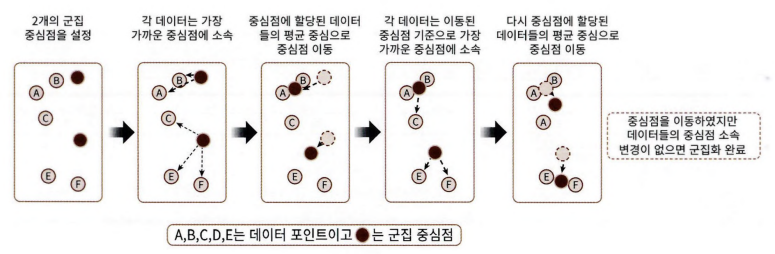

- K-평균의 장점 (+)
   - 일반적으로 가장 많이 활용되는 알고리즘
   - 쉽고 간결한 원리
- K-평균의 단점 (-)
   - 거리 기반 알고리즘이기 때문에 속성의 개수가 너무 많을 경우 군집화의 정확도가 떨어짐. (이 경우, 차원 감소를 위해 PCA를 적용해야함.)
   - 반복 수행 회수가 많을 경우 수행 시간이 오래 걸림.
   - 몇 개의 군집(cluster)을 선택해야 할지가 어려움.

**사이킷런 KMeans 클래스 소개**


```
class sklearn.cluster.KMeans(**n_clusters**=8, **init**='k-means++', n_init=10,
**max_iter**=300, tol=0.0001, precompute_distances='auto', verbose=0,
random_state=None, copy_x=True, algorithm='auto')
```
- 파라미터
   - n_clusters : 군집화할 개수, 군집 중심점의 개수
   - init : 초기에 군집 중심점의 좌표를 설정할 방식. 일반적으로 임의가 아닌 'k-means++' 방식으로 설정함.
   - max_iter : 최대 반복 횟수

- 객체의 속성
   - labels_ : 각 데이터가 속한 군집 중심점의 레이블 값
   - cluster_centers_ : 각 군집 중심점의 좌표. Shape는 [군집 개수, 피처 개수]. 군집 위치 시각화 가능.



**K-평균을 이용한 붓꽃 데이터 세트 군집화**

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data,
                      columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
# 붓꽃 데이터 세트를 3개의 그룹으로 군집화
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [3]:
# irisDF의 각 데이터가 몇 번째 군집 속하는지 확인
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [4]:
# 실제 분류값인 target과 군집화 분류값인 cluster 레벨로 적용해 target과 cluster의 값 개수 비교
## Target 0 값 데이터는 1번 군집으로 모두 잘 그루핑됨. Target 1 값 데이터는 3개를 제외하고 0번 군집으로 그루핑됨.
## Target 2 값 데이터는 0번 군집에 14개, 2번 군집에 36개로 분산되어 그루핑됨.
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [5]:
# <PCA를 이용해 4개의 속성을 2개로 차원축소한 후 X 좌표, Y 좌표로 개별 데이터의 군집화 시각화>

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


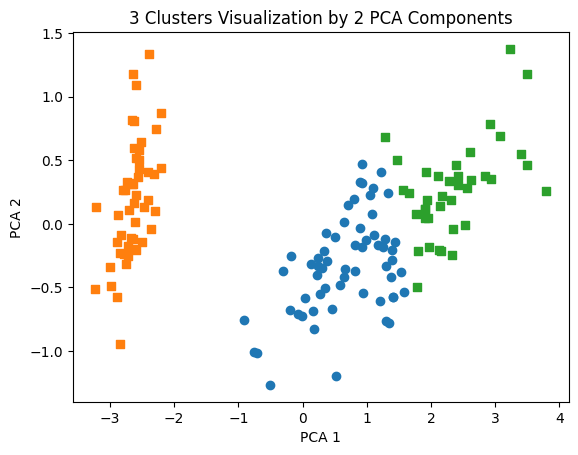

In [6]:
# 군집값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y값 추출. o, s, ^로 마커 표시.
## Cluster 1은 다른 군집과 명확히 잘 구분되어있음. Cluster 0과 2는 Cluster 1만큼은 명확하게 구분되어있진 않음.
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='s')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

**군집화 알고리즘 테스트를 위한 데이터 생성**

군집화용 데이터 생성기 API는 여러 개의 클래스에 해당하는 데이터 세트를 만듦. 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터 생성이 가능함.
- 군집화용 데이터 생성기 종류
   - make_blobs( ) : 개별 군집 중심점과 표준 편차 제어 기능이 있음.
     
     (예) 총 200개의 레코드, 2개의 피처가 3개의 군집화 기반 분포도를 가진 피처 데이터 세트 X, 3개의 군집화 값을 가진 타깃 데이터 세트 y 생성하는 코드
      ```
      X, y = make_blobs(n_samples=200, n_features=2, centers=3, random_state=0)
      ```


   - make_classification( ) : 노이즈를 포함한 데이터 생성 가능.
   - make_circle( ), make_moon( ) : 중심 기반의 군집화로 해결하기 어려운 데이터 세트 생성 가능.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target값의 분포를 확인
## 3개의 cluster의 값이 균일하게 구성되어 있음.
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [8]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


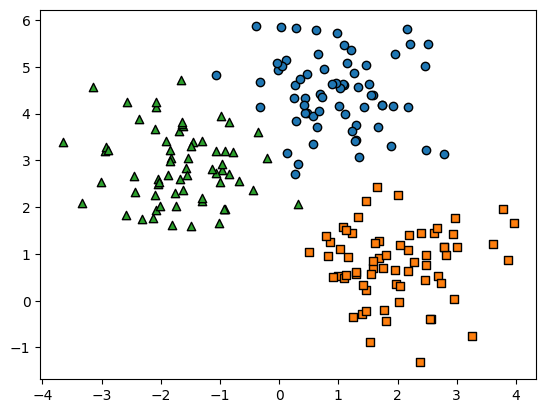

In [9]:
# <make_blob()로 만든 피처 데이터 세트가 어떤 군집화 분포를 만들었는지 확인하기>

target_list = np.unique(y)

# 각 타깃값 산점도의 마커 값
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2].
# target == 0, 1, 2로 scatter plot을 marker별로 생성
for target in target_list:
  target_cluster = clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'],
              edgecolor='k', marker=markers[target])
plt.show()

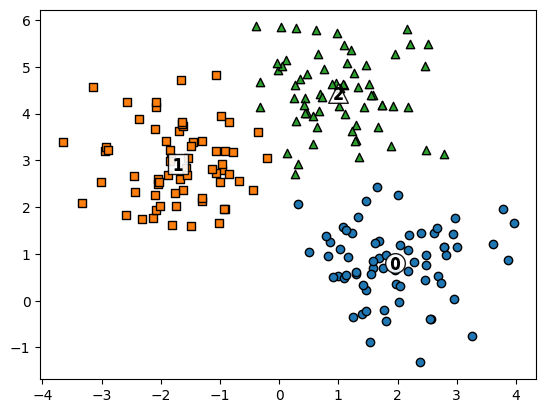

In [10]:
# <만들어진 데이터 세트에 KMeans 군집화를 수행한 후에 시각화하기>

# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집화된 label 유형별로 iteration 하면서 marker별로 scatter plot 수행
for label in unique_labels:
  label_cluster = clusterDF[clusterDF['kmeans_label']==label]
  center_x_y = centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'],
              edgecolor='k', marker=markers[label])
  # 군집별 중심위치 좌표 시각화
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
              alpha=0.9, edgecolor='k', marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
              edgecolor='k', marker='$%d$' % label)
plt.show()

In [12]:
# 실제 타깃값과 군집화된 값 비교
## Target 0이 2번째 군집, target 1이 0번째 군집, target 2이 1번째 군집으로 잘 매핑됨.
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


####**군집 평가 (Cluster Evaluation)**

앞의 데이터 세트의 경우엔 결과값에 정해진 타깃 레이블이 있었고, 군집화 결과를 이 레이블과 비교하여 군집화가 얼마나 잘 되었는지 알 수 있었음. 하지만, 군집화의 대상이 되는 대부분의 데이터 세트는 타깃 레이블을 가지고 있지 않음. 또한, 지도 학습인 분류(Classification)와는 다르게 **비지도 학습**인 군집화(Clustering)는 정확하게 성능을 평가하기가 어려움. 대표적인 군집화 성능 평가 방법으로 "실루엣 분석"이 있음.

**실루엣 분석의 개요**

다른 군집과의 거리는 떨어져 있고, 동일 군집끼리의 데이터는 서로 가깝고 균일하게 뭉쳐 있을수록 효율적으로 잘 분리됐다는 뜻.


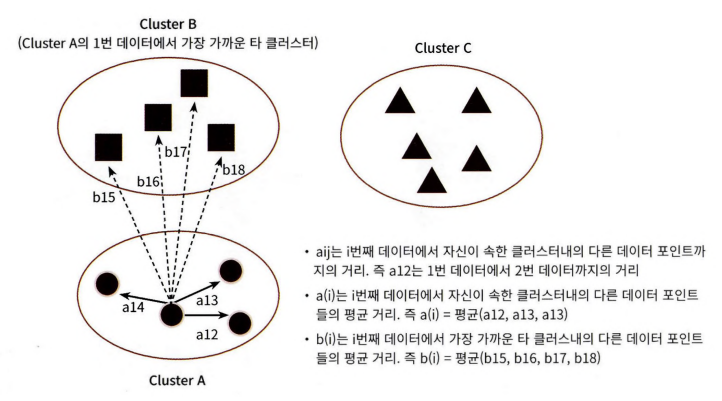

- 좋은 군집화의 기준
   1. 전체 실루엣 계수의 평균값이 1에 가까울수록 군집화가 어느 정도 잘 되었다고 판단 가능. But, 무조건 이 값이 높을수록 좋은 군집화를 의미하는 것은 아님.
   2. 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않으면서, 편차가 크지 않는 것이 중요함!!  

- i번째 데이터 포인트의 **실루엣 계수** 값
   - 근처 군집과 얼마나 떨어져 있는지를 알 수 있음.
   - s(i) = { b(i) - a(i) } / max(a(i), b(i))
      
      (a(i)는 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리의 평균 값,
      
      b(i)는 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 거리의 평균 값)
   - -1과 1 사이의 값
   - 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 뜻.

     0에 가까울수록 근처의 군집과 가깝다는 뜻.
   - 음수값이면 아예 다른 군집에 데이터 포인트가 할당되었다는 뜻.


- 사이킷런이 제공하는 메서드
   - 각 데이터 포인트의 실루엣 계수값
   ```
   sklearn.metrics.silhouette_samples(X, labels, metric='euclidean', **kwds)
   ```
   - 전체 데이터의 실루엣 계수 평균값. 즉, np.mean(sihoulette_samples( ))
   ```
   sklearn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, **kwds)
   ```

단, 실루엣 계수를 통한 K-평균 군집 평가는 직관적으로 이해하기 쉽지만, 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야하므로 데이터의 양이 늘어나면 수행시간이 크게 늘어남. 이 경우 군집별로 임의의 데이터를 샘플링하여 실루엣 계수를 계산하는 평가 방안을 고민해야 함.

**붓꽃 데이터 세트를 이용한 군집 평가**


In [13]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수값 구하기
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape:', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값 구하기
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape: (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.551


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


In [14]:
# 군집별 평균 실루엣 계수값 확인하기
## 1번 군집은 실루엣 계수 평균값 약 0.79인데에 반해, 0번은 약 0.422, 2번은 약 0.45로 1번에 비해 낮음.
## 개별 군집내의 데이터 밀집도가 균일한거 같진 않음.
irisDF.groupby(['cluster'])['silhouette_coeff'].mean()

,silhouette_coeff
cluster,
0,0.422323
1,0.797604
2,0.436842


**군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법**

개별 군집별 실루엣 계수 평균값을 시각적으로 확인 가능



In [15]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

def visualize_silhouette(cluster_lists, X_features):
    """
    여러 개의 군집 개수에 대해 KMeans 군집화와 실루엣 계수를 시각화합니다.

    Parameters:
    cluster_lists: list
        군집 개수로 사용할 정수 리스트 (예: [2, 3, 4, 5])
    X_features: array-like
        군집화에 사용할 피처 데이터 세트
    """
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(1, n_cols, figsize=(4 * n_cols, 6))

    if n_cols == 1:
        axs = [axs]  # 단일 subplot에도 리스트로 접근 가능하도록 처리

    for idx, n_clusters in enumerate(cluster_lists):
        # KMeans 모델 학습 및 예측
        kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        cluster_labels = kmeans.fit_predict(X_features)

        # 실루엣 계수 계산
        silhouette_avg = silhouette_score(X_features, cluster_labels)
        sample_silhouette_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[idx].set_title(f"Clusters: {n_clusters}\nAvg Silhouette: {silhouette_avg:.2f}")
        axs[idx].set_xlim([-0.1, 1])
        axs[idx].set_ylim([0, len(X_features) + (n_clusters + 1) * 10])
        axs[idx].set_xlabel("Silhouette Coefficient Values")
        axs[idx].set_ylabel("Cluster Label")

        # 각 군집별 실루엣 계수 플롯
        for i in range(n_clusters):
            cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            cluster_silhouette_values.sort()

            size_cluster_i = cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            axs[idx].fill_betweenx(
                np.arange(y_lower, y_upper),
                0, cluster_silhouette_values,
                facecolor=color, edgecolor=color, alpha=0.7
            )

            axs[idx].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10  # 10은 클러스터 간의 공백

        axs[idx].axvline(x=silhouette_avg, color="red", linestyle="--")
        axs[idx].set_yticks([])  # y축 틱 제거
        axs[idx].set_xticks(np.arange(-0.1, 1.1, 0.2))

    plt.tight_layout()
    plt.show()

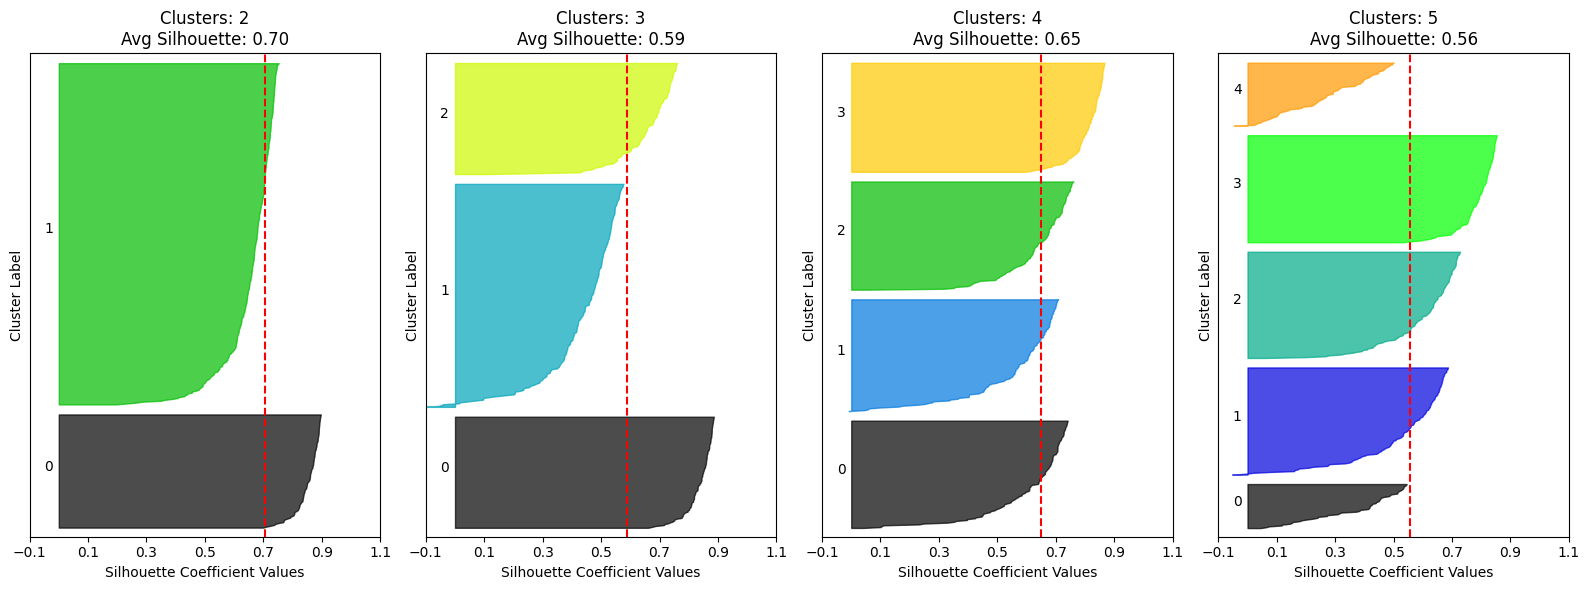

In [17]:
# make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# 군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2, 3, 4, 5], X)

<해석>

- 군집이 3개인 경우

   0, 2번 군집에 속한 데이터 포인트들의 실루엣 계수는 대부분 전체 실루엣 계수 평균값(빨간 점선)보다 크지만, 1번 군집의 경우 모두 평균보다 낮음.

- 군집이 4개인 경우

   3번 군집의 경우 모든 데이터가 평균보다 높은 계수값을 가지며, 0, 1, 2번 군집의 경우 약 절반 정도가 평균보다 높은 계수값을 가짐. 각 군집들이 제일 균일한 분포를 가지는 것으로 보임.  

군집 개수가 2개일 때 전체 실루엣 계수의 평균값이 제일 크지만, 군집 개수가 4개일 때 개별 군집의 평균 실루엣 계수 값이 제일 균일하게 위치하고 있음. --> 4개가 가장 이상적인 군집화 개수

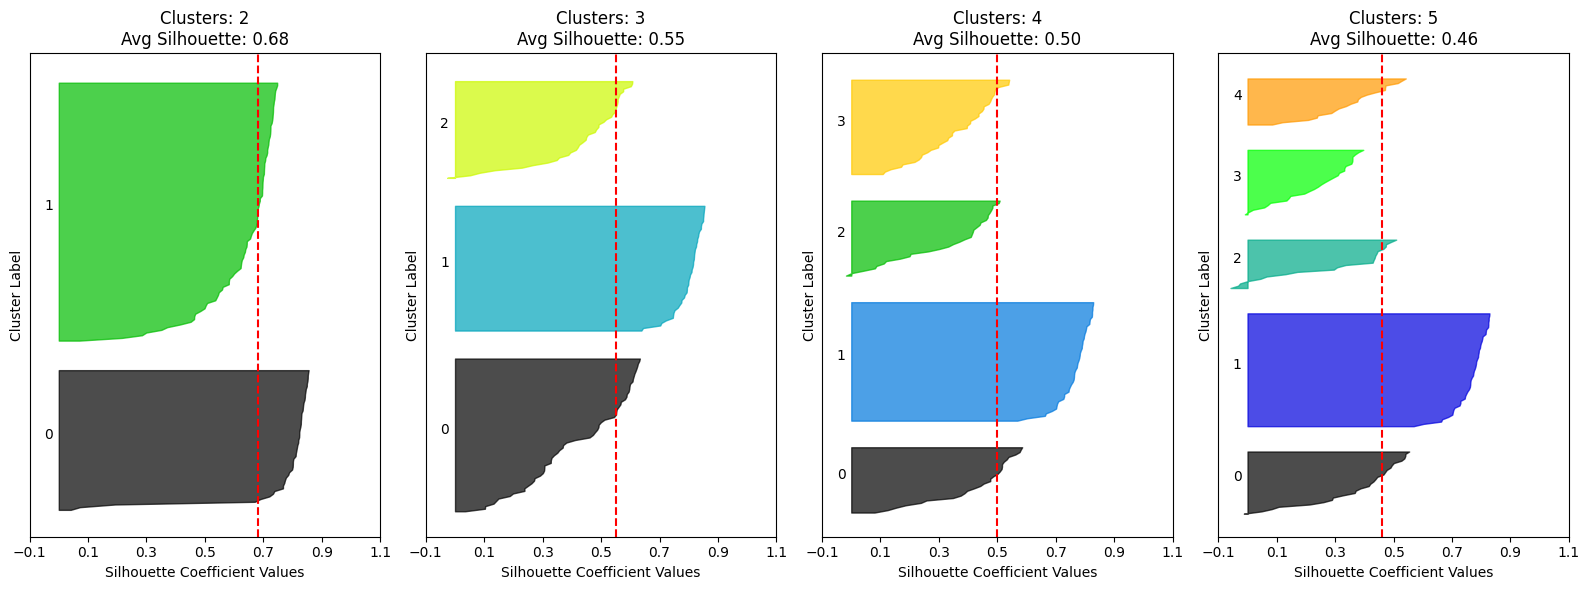

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()
visualize_silhouette([2, 3, 4, 5], iris.data)

군집 개수가 2개일 때 평균 실루엣 계수값이 제일 크며, 동시에 다른 경우들에 비해 각 군집의 실루엣 계수의 편차가 균일함. --> 2개가 가장 이상적인 군집화 개수